Выполнение заданий 1(а) и 1(b)

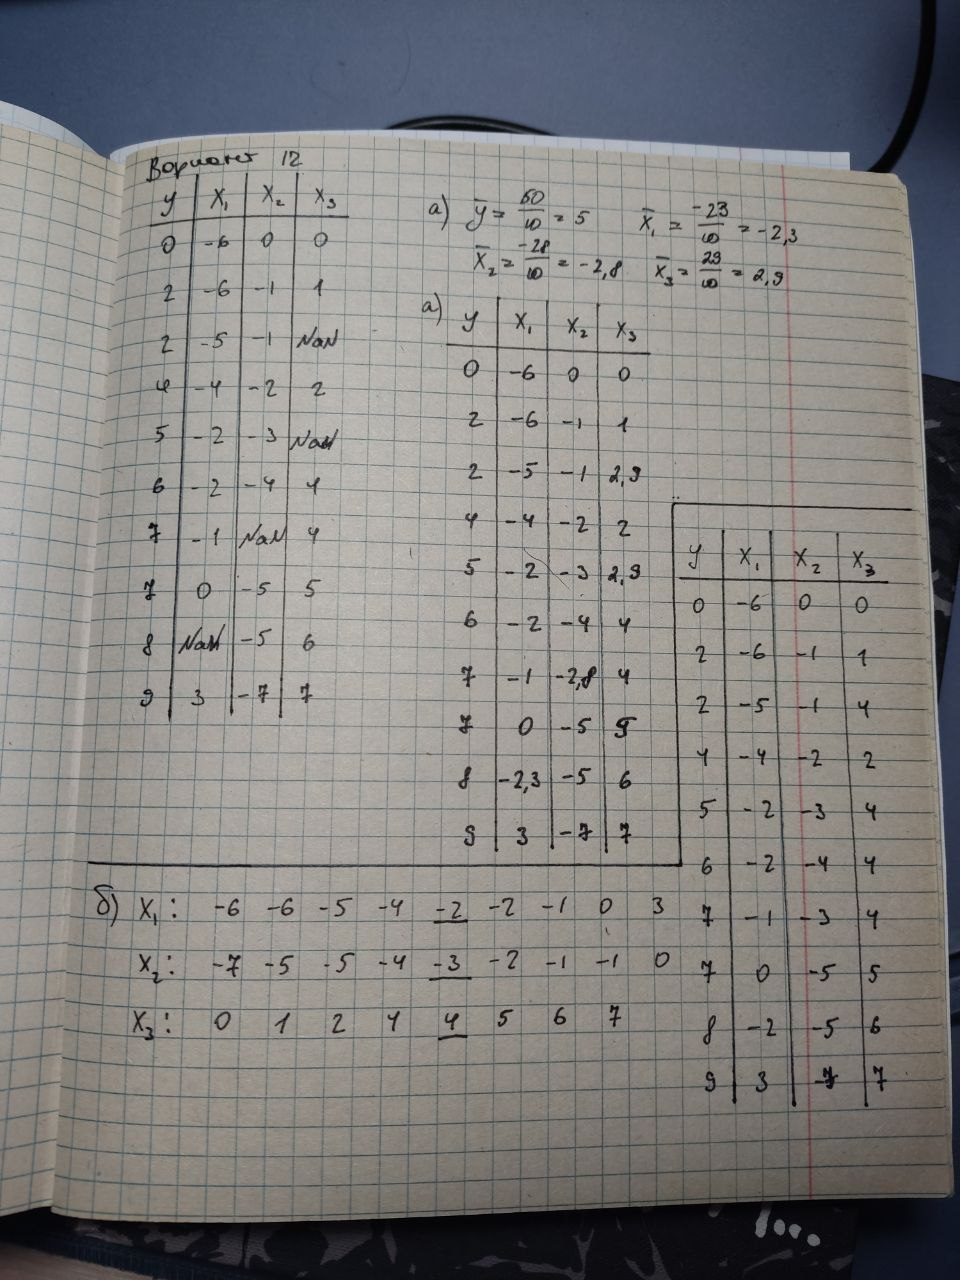

1(c)

In [ ]:
import numpy as np

# Данные Варианта 12
y = np.array([0, 2, 2, 4, 5, 6, 7, 7, 8, 9])
x1 = np.array([-6, -6, -5, -4, -2, -2, -1, 0, np.nan, 3])
x2 = np.array([0, -1, -1, -2, -3, -4, np.nan, -5, -5, -7])
x3 = np.array([0, 1, np.nan, 2, np.nan, 4, 4, 5, 6, 7])

def quadratic_interpolate(y_full, x_with_nan):
    """Квадратичная интерполяция пропущенных значений"""
    x_filled = x_with_nan.copy()
    nan_mask = np.isnan(x_with_nan)

    for i in np.where(nan_mask)[0]:
        # Выбираем три ближайшие известные точки
        known_mask = ~np.isnan(x_with_nan)
        distances = np.abs(y_full[known_mask] - y_full[i])
        idx = np.argpartition(distances, 3)[:3]

        y_vals = y_full[known_mask][idx]
        x_vals = x_with_nan[known_mask][idx]

        # Строим квадратичный многочлен
        A = np.column_stack([y_vals**2, y_vals, np.ones(3)])
        coefs = np.linalg.lstsq(A, x_vals, rcond=None)[0]

        # Вычисляем значение в целевой точке
        x_filled[i] = coefs[0] * y_full[i]**2 + coefs[1] * y_full[i] + coefs[2]

    return x_filled

# Восполнение пропусков
x1_filled = quadratic_interpolate(y, x1)
x2_filled = quadratic_interpolate(y, x2)
x3_filled = quadratic_interpolate(y, x3)

print("Восстановленные данные для Варианта 12:")
print("y   x1     x2     x3")
for i in range(len(y)):
    print(f"{y[i]:1.0f}  {x1_filled[i]:5.2f}  {x2_filled[i]:5.2f}  {x3_filled[i]:5.2f}")

Восстановленные данные для Варианта 12:
y   x1     x2     x3
0  -6.00   0.00   0.00
2  -6.00  -1.00   1.00
2  -5.00  -1.00   1.00
4  -4.00  -2.00   2.00
5  -2.00  -3.00   3.00
6  -2.00  -4.00   4.00
7  -1.00  -5.00   4.00
7   0.00  -5.00   5.00
8   1.05  -5.00   6.00
9   3.00  -7.00   7.00


1(d)

In [ ]:
from scipy.interpolate import CubicHermiteSpline

# Данные Варианта 12
y = np.array([0, 2, 2, 4, 5, 6, 7, 7, 8, 9])
x1 = np.array([-6, -6, -5, -4, -2, -2, -1, 0, np.nan, 3])
x2 = np.array([0, -1, -1, -2, -3, -4, np.nan, -5, -5, -7])
x3 = np.array([0, 1, np.nan, 2, np.nan, 4, 4, 5, 6, 7])

def fill_with_hermite(y_full, x_with_nan):
    """Восполнение пропусков с помощью кубической интерполяции Эрмита"""
    # Удаляем NaN значения
    mask = ~np.isnan(x_with_nan)
    y_known = y_full[mask]
    x_known = x_with_nan[mask]

    # Убираем дубликаты по y
    y_unique, indices = np.unique(y_known, return_index=True)
    x_unique = x_known[indices]

    # Если недостаточно точек, возвращаем исходный массив
    if len(y_unique) < 2:
        return x_with_nan

    # Оцениваем производные (центральные разности)
    dy = np.gradient(x_unique, y_unique)

    # Создаем интерполянт Эрмита
    spline = CubicHermiteSpline(y_unique, x_unique, dy)

    # Восстанавливаем пропущенные значения
    x_filled = x_with_nan.copy()
    nan_indices = np.isnan(x_with_nan)
    x_filled[nan_indices] = spline(y_full[nan_indices])

    return x_filled

# Восполнение пропусков
x1_filled = fill_with_hermite(y, x1)
x2_filled = fill_with_hermite(y, x2)
x3_filled = fill_with_hermite(y, x3)

print("Итоговая таблица после интерполяции Эрмита:")
print("y   x1       x2       x3")
for i in range(len(y)):
    print(f"{y[i]:1.0f}  {x1_filled[i]:7.3f}  {x2_filled[i]:7.3f}  {x3_filled[i]:7.3f}")

Итоговая таблица после интерполяции Эрмита:
y   x1       x2       x3
0   -6.000    0.000    0.000
2   -6.000   -1.000    1.000
2   -5.000   -1.000    1.000
4   -4.000   -2.000    2.000
5   -2.000   -3.000    3.104
6   -2.000   -4.000    4.000
7   -1.000   -5.000    4.000
7    0.000   -5.000    5.000
8    0.833   -5.000    6.000
9    3.000   -7.000    7.000


Задание 2

In [ ]:
y = np.array([0, 2, 2, 4, 5, 6, 7, 7, 8, 9])
x1 = np.array([-6, -6, -5, -4, -2, -2, -1, 0, np.nan, 3])
x2 = np.array([0, -1, -1, -2, -3, -4, np.nan, -5, -5, -7])
x3 = np.array([0, 1, np.nan, 2, np.nan, 4, 4, 5, 6, 7])

# Объединяем данные в матрицу
data = np.column_stack([y, x1, x2, x3])

# Удаляем строки с пропусками
clean_data = data[~np.isnan(data).any(axis=1)]

print("Таблица после удаления строк с пропусками:")
print("y   x1   x2   x3")
for row in clean_data:
    print(f"{row[0]:1.0f}  {row[1]:3.0f}  {row[2]:3.0f}  {row[3]:3.0f}")

Таблица после удаления строк с пропусками:
y   x1   x2   x3
0   -6    0    0
2   -6   -1    1
4   -4   -2    2
6   -2   -4    4
7    0   -5    5
9    3   -7    7


Задание 3

In [ ]:
import numpy as np

datasets = {
    "Среднее": {
        'y': [0, 2, 2, 4, 5, 6, 7, 7, 8, 9],
        'x1': [-6, -6, -5, -4, -2, -2, -1, 0, -2.3, 3],
        'x2': [0, -1, -1, -2, -3, -4, -2.8, -5, -5, -7],
        'x3': [0, 1, 2.9, 2, 2.9, 4, 4, 5, 6, 7]
    },
    "Медиана": {
        'y': [0, 2, 2, 4, 5, 6, 7, 7, 8, 9],
        'x1': [-6, -6, -5, -4, -2, -2, -1, 0, -2, 3],
        'x2': [0, -1, -1, -2, -3, -4, -3, -5, -5, -7],
        'x3': [0, 1, 4, 2, 4, 4, 4, 5, 6, 7]
    },
    "Интерполяция": {
        'y': [0, 2, 2, 4, 5, 6, 7, 7, 8, 9],
        'x1': [-6, -6, -5, -4, -2, -2, -1, 0, 1.05, 3],
        'x2': [0, -1, -1, -2, -3, -4, -5, -5, -5, -7],
        'x3': [0, 1, 1, 2, 3, 4, 4, 5, 6, 7]
    },
    "Эрмит": {
        'y': [0, 2, 2, 4, 5, 6, 7, 7, 8, 9],
        'x1': [-6, -6, -5, -4, -2, -2, -1, 0, 0.833, 3],
        'x2': [0, -1, -1, -2, -3, -4, -5, -5, -5, -7],
        'x3': [0, 1, 1, 2, 3.104, 4, 4, 5, 6, 7]
    },
    "Без пропусков": {
        'y': [0, 2, 4, 6, 7, 9],
        'x1': [-6, -6, -4, -2, 0, 3],
        'x2': [0, -1, -2, -4, -5, -7],
        'x3': [0, 1, 2, 4, 5, 7]
    }
}


for name, data in datasets.items():
    y = np.array(data['y'])
    X = np.column_stack([data['x1'], data['x2'], data['x3']])

    # Добавляем свободный член
    X_full = np.column_stack([np.ones(len(y)), X])

    # Используем псевдообратную матрицу вместо обратной
    beta = np.linalg.pinv(X_full) @ y

    y_pred = X_full @ beta
    r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

    print(f"\n{name}:")
    print(f"y = {beta[0]:.3f} + {beta[1]:.3f}*x1 + {beta[2]:.3f}*x2 + {beta[3]:.3f}*x3")
    print(f"R² = {r2:.4f}")


Среднее:
y = 2.204 + 0.235*x1 + -0.407*x2 + 0.615*x3
R² = 0.9182

Медиана:
y = 1.999 + 0.188*x1 + -0.851*x2 + 0.225*x3
R² = 0.9136

Интерполяция:
y = -1.051 + -0.279*x1 + -0.861*x2 + 0.786*x3
R² = 0.9764

Эрмит:
y = -1.622 + -0.365*x1 + -0.896*x2 + 0.862*x3
R² = 0.9781

Без пропусков:
y = -3.268 + -0.594*x1 + -1.018*x2 + 1.018*x3
R² = 0.9833


Задание 4

К наилучшему значению коэф. детерминации приводит способ без пропусков

Сравнение корректно, потому что мы оцениваем эффективность разных методов обработки пропусков для решения одной и той же задачи